# Project: To predict the annual restaurant sales of 100k regional locations

# Introduction


Tab Food Investments (TFI) is the company behind some of the world’s most well-known
brands such as Burger King, Sbarro, Popeyes, Usta Donerci and Arby’s, with over 1200 quick
service restaurants across the globe. They employ over 20,000 people in Europe and Asia and
they are the Leading Quick Service Restaurant (QSR) operator in Turkey and China.

# Business Problem

Right now, new restaurants are launched in a particular location is commonly a subjective
process based on the personal judgement and experience of development teams. This
subjective data is hard to meaningfully extrapolate across different geographies and cultures.

It takes large investments of time and capital to set up new restaurants and running. The site
closes within 18 months by incurring operating losses, when the wrong location for a restaurant
brand is chosen.

We are expected to find a mathematical model to increase the effectiveness of investments in
new restaurant sites which would allow TFI to invest more in other important business areas,
like innovation, sustainability, and training for new employees. We would try to predict the
Annual Restaurant sales of 100,000 regional locations based on the given Commercial,
Demographic and Real Estate data.


# Dataset Overview

The TFI Dataset consists the Train and Test Dataset files. There are 137 entries of Restaurants
in the Train dataset which will used for training and fitting the model. The Test dataset consists
of 100,000 samples of data which will be used for the evaluation of the model. We can observe
that the train dataset provided is very small compared to the test dataset.

The Test Dataset has similar features of the Train Dataset except that the Revenue column can
be only found in the train data. The features of the dataset are described below:

• ID – Restaurant Id

• Open Date- Date of Lauch of the Restaurant

• City- The city name where the Restaurant situates

• City Group- The category of the city which the restaurant belongs.

• Type- The type of the Restaurant with categories as Food court, Drive-Thru, Mobile,
Inline.

• P variables (P1-P37)- These variables represent the obfuscate data of three categories:

1. Demographic data - Population, Age, Gender etc.
2. Real Estate data – Car parking availability, Front Façade etc.
3. Commercial data - Points of Interest such as Colleges, Market etc.

• Revenue- Annual Revenue of a Restaurant in a given year.
So, there are 43 features in the Train dataset including the Restaurant id. Since the revenue
column is excluded in the test data it has 42 attributes in total.





Let's deep dive into the project !

## Importing Necessary Libraries

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from scipy.stats import norm,skew
from sklearn import preprocessing  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Loading Data

In [5]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

# Data Overview

In [6]:
# No. of records and dimensions respectively
train_data.shape, test_data.shape

((137, 43), (100000, 42))

We can see that the Train dataset consists of 137 rows/records and 43 Features/Dimensions, wherereas the Test dataset contains 100000 rows and 42 columns.

Lets display & check the dataset. 

In [7]:
# To print the first 5 record
train_data.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [8]:
test_data.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


From the above tables we could find the Test dataset doesn't consist of the 'revenue' column. 

So the target variable is only present in the Train Dataset. We have to predict the Revenue variable using the features given in the test dataset .

In [10]:
# To print the basic infomation about the dataset like Feature datatypes, Non-null count etc.
train_data.info() 
print("************************************************************")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

#### No. of null values

In [27]:
print("For Train Dataset\n")
print(train_data.isnull().sum())
print("**************************************")
print("For Test Dataset\n")
print(test_data.isnull().sum())

For Train Dataset

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64
**************************************
For Test Dataset

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0

There are no null values in the Train and Test dataset which implies we dont't have to implement the different preprocessing steps for handling the null or missing values.

#### No. of Duplicated rows

In [30]:
print("No. of duplicated rows in Train dataset  " ,train_data.duplicated().sum())
print("\n*********************************\n")
print("No. of duplicated rows in Test dataset : " ,test_data.duplicated().sum())


No. of duplicated rows in Train dataset   0

*********************************

No. of duplicated rows in Test dataset :  0


There are no duplicate rows as well in the Train and Test Dataset.

#### No. of unique values in a Column

In [34]:
print("For Train Dataset\n")
print(train_data.nunique())
print("\n***********************\n")
print("For Test Dataset\n")
print(test_data.nunique())


For Train Dataset

Id            137
Open Date     134
City           34
City Group      2
Type            3
P1              8
P2              8
P3              8
P4              6
P5              7
P6              8
P7              6
P8              8
P9              4
P10             4
P11             8
P12             7
P13             5
P14            10
P15             8
P16             9
P17             9
P18             7
P19             9
P20             9
P21             8
P22             5
P23             9
P24             9
P25             8
P26            10
P27             9
P28             9
P29             7
P30             9
P31            10
P32            10
P33             6
P34             8
P35             8
P36             8
P37             8
revenue       137
dtype: int64

***********************

For Test Dataset

Id            100000
Open Date        310
City              57
City Group         2
Type               4
P1                 9
P2                 9
P3 

From the above details, we can observe that the column 'Id' is just an index columnn which wont add any importance to the data. So we can drop this unnecessary column from both of the datasets.

#### Dropping the unnecessary column

In [35]:
train_df=train_data.drop('Id',axis=1)
test_df=test_data.drop('Id',axis=1)

In [36]:
train_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


### Columns

Let's check the columns of the Train and Test dataset in details. 

In [42]:
print("For Train data \n")
print(train_df.columns)
print("\nNo. of Columns : ",len(train_df.columns))

print("\n*******************************************\n")

print("For Test data \n")
print(test_df.columns)
print("\nNo. of Columns : ",len(test_df.columns))

For Train data 

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

No. of Columns :  42

*******************************************

For Test data 

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37'],
      dtype='object')

No. of Columns :  41


### Numeric Columns

In [46]:
print("For Train data \n")
numeric_columns=list(train_df.select_dtypes(exclude=['object','datetime']).columns)
print(numeric_columns)
print("\nNo. of Numeric Columns : ",len(numeric_columns))

print("\n*******************************************\n")

print("For Test data \n")
numeric_columns=list(test_df.select_dtypes(exclude=['object','datetime']).columns)
print(numeric_columns)
print("\nNo. of Numeric Columns : ",len(numeric_columns))


For Train data 

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']

No. of Numeric Columns :  38

*******************************************

For Test data 

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']

No. of Numeric Columns :  37


### Categorical Features

In [45]:
print("For Train data \n")
categorical_columns=list(train_df.select_dtypes(include=['object']).columns)
print(categorical_columns)
print("No. of Categorical Columns : ",len(categorical_columns))

print("\n*******************************************\n")

print("For Test data \n")
categorical_columns=list(test_df.select_dtypes(include=['object']).columns)
print(categorical_columns)
print("No. of Categorical Columns : ",len(categorical_columns))

For Train data 

['Open Date', 'City', 'City Group', 'Type']
No. of Categorical Columns :  4

*******************************************

For Test data 

['Open Date', 'City', 'City Group', 'Type']
No. of Categorical Columns :  4


In [49]:
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis & Feature Engineering

## Univariate Analysis

### Target Variable

##### How  is the 'Revenue' (Target variable) distributed ?

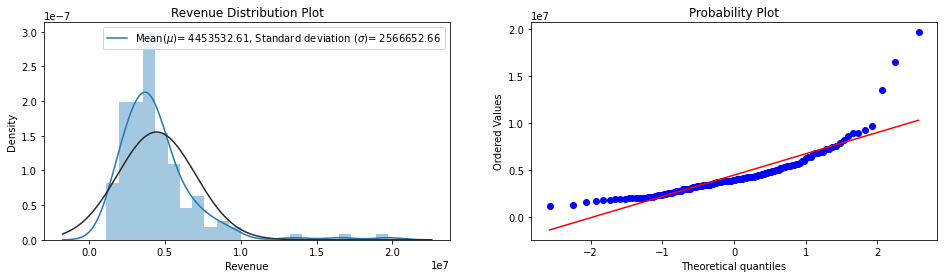

In [54]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(16,4))
mean,sd=norm.fit(train_df.revenue)
fig1=sns.distplot(train_df.revenue,ax=fig1,fit=norm)
fig1.set_xlabel("Revenue")
fig1.set_title("Revenue Distribution Plot")
fig1.legend([f'Mean($\mu$)= {mean:.2f}, Standard deviation ($\sigma$)= {sd:.2f}'],loc='best')
fig2=stats.probplot(train_df.revenue,plot=fig2)
f.show()



From the above plots, we can observe that the distribution of revenue is right skewed. This may be because of the presence of outliers in the data. 

So let's do some transformation on the revenue column inorder to make it normally distributed so that it can reduce the effect of outliers and improve the model perfomance. 

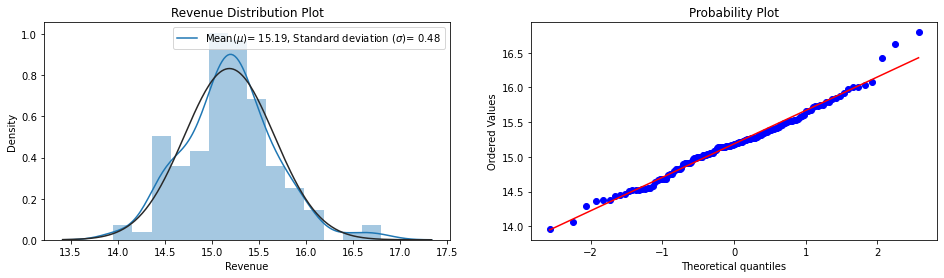

In [55]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(16,4))
mean,sd=norm.fit(np.log(train_df.revenue))
fig1=sns.distplot(np.log(train_df.revenue),ax=fig1,fit=norm)
fig1.set_xlabel("Revenue")
fig1.set_title("Revenue Distribution Plot")
fig1.legend([f'Mean($\mu$)= {mean:.2f}, Standard deviation ($\sigma$)= {sd:.2f}'],loc='best')
fig2=stats.probplot(np.log(train_df.revenue),plot=fig2)
f.show()

### Categorical Features

##### What is the no. of restaurants belonging to each 'Type' ?

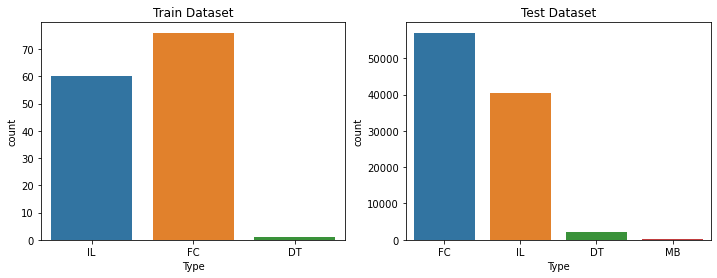

In [127]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(12,4))
fig1=sns.countplot(train_df.Type,ax=fig1)
fig1.set_title("Train Dataset")
fig2=sns.countplot(test_df.Type,ax=fig2)
fig2.set_title("Test Dataset")
f.show()

From the above plot, we can observe that FC(Food-Courts) are highest in number in both train and test datasets which is followed by Inline Type Restaurants.

The Drive-Thru type restaurants are very small in number in both datasets while Mobile Type is not found in the Train datasets. 

This implies that Food courts and Inline Type restaurants are the most preferred by people and generates more revenue since it has many outlets.

##### What is the no. of restuarants belonging to different 'City Types' ?

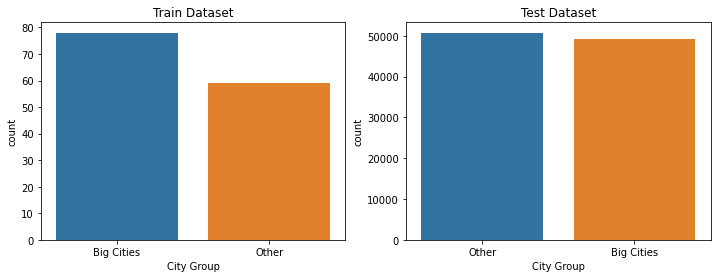

In [130]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(12,4))
fig1=sns.countplot(train_df['City Group'],ax=fig1)
fig1.set_title("Train Dataset")
fig2=sns.countplot(test_df['City Group'],ax=fig2)
fig2.set_title("Test Dataset")
f.show()

The above visualizations shows that the number of restaurants in Big Cities are more than that in Other cities.

But both of these categories has a small difference only in both of the datasets.

##### What is the no. of restaurants located in each 'City' ?

Let's check the no. of restuarants in each city in the Training dataset.  

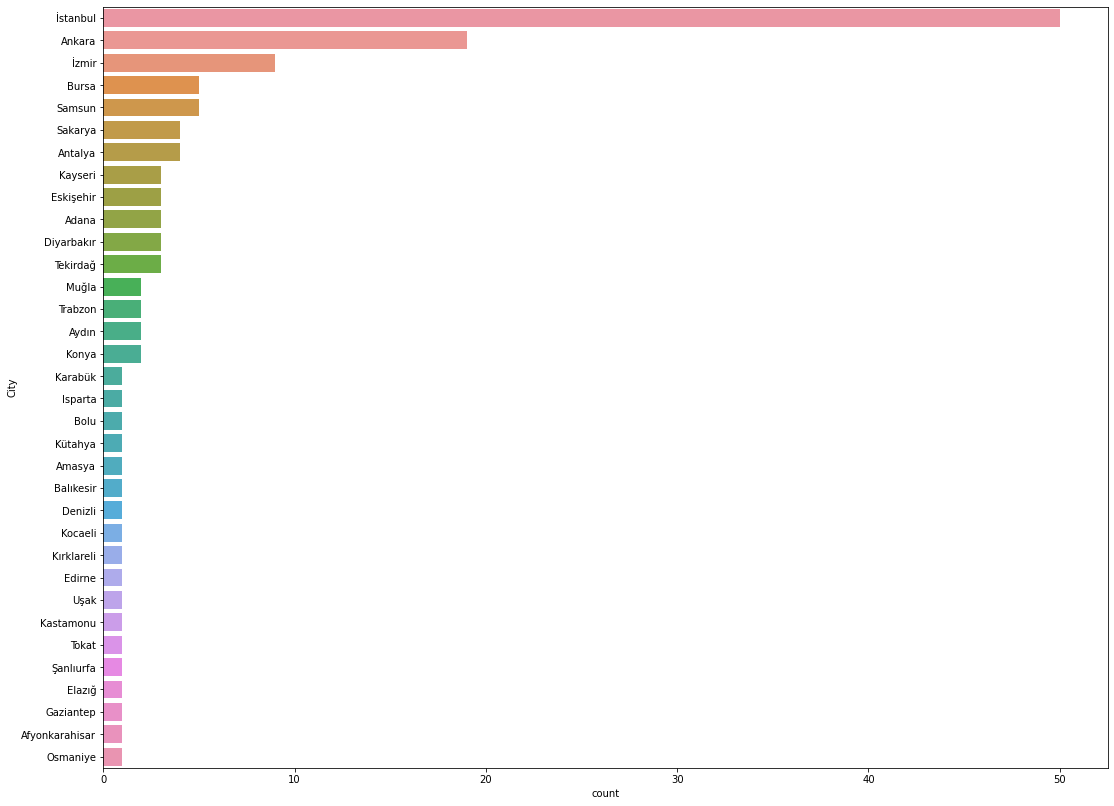

In [135]:
plt.figure(figsize=(18,14))
sns.countplot(data=train_df,y='City',order=train_df.City.value_counts(ascending=False).index)
plt.show()

There are many cities with very few number of restaurants. Most restaurants are located in some important cities. 

Let's check the cities with major number of restaurants.

In [58]:
counts = train_df['City'].value_counts() #counts unique values
percent = ((train_df['City'].value_counts()/train_df['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
İstanbul,50,36.5%
Ankara,19,13.9%
İzmir,9,6.6%
Bursa,5,3.6%
Samsun,5,3.6%


The above table shows that the cities called Istanbul, Ankara, Izmir has around 55% of the total no. of all restaurants in the train dataset.



Let's check the cities in the Test Dataset...


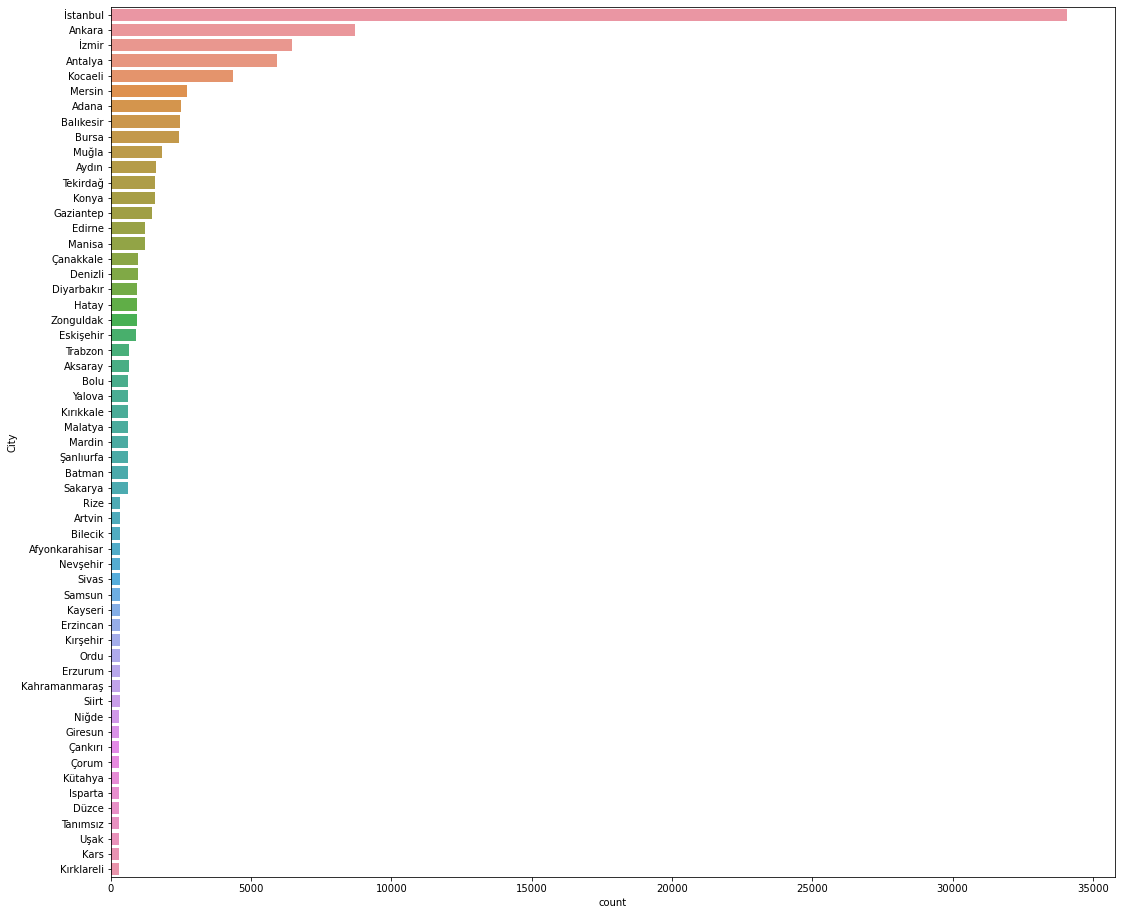

In [142]:
plt.figure(figsize=(18,16))
sns.countplot(data=test_df,y='City',order=test_df.City.value_counts(ascending=False).index)
plt.show()

In the test dataset also it is evident that most of the restaurants are located in few major cities. 

So, lets see which are these cities ...

In [57]:
counts = test_df['City'].value_counts() 
percent = ((test_df['City'].value_counts()/test_df['City'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
İstanbul,34087,34.1%
Ankara,8720,8.7%
İzmir,6465,6.5%
Antalya,5911,5.9%
Kocaeli,4364,4.4%


The table above also shows the cities with more than 55% of the total no. of restaurants. 

As in the train Dataset-Istanbul,Ankara and Izmir are the top 3 cities . 

Other key observation is that the cities Antalya and Kocaeli which are not in the top 5 cities in the train dataset are found in the 4th and 5th postions in the test dataset based on the no. of restaurants located there.

Also, by observing the above visualizations on Cities we could easily find that the test dataset has more no. of cities listed in it. 

Let's check this ...

In [59]:
print("Train Dataset- No. of Cities : ",train_df['City'].nunique())
print("\nTest Dataset- No. of Cities : ",test_df['City'].nunique())

Train Dataset- No. of Cities :  34

Test Dataset- No. of Cities :  57


So from the above numbers we can understand that the Test dataset contains 23 more number of cities than that listed in the Train dataset. 

This may lead to some issues in model perfomance, so this has to be tackled during the Feature engineering procedures.

##### Analyzing the 'Open Date' Feature

In [217]:
# we can remove the open date column later

The Open date feature as in it's raw form may not be helpfull for drawing out insights. 

But we can extract useful insights from the open date feature as well.

Since we are going to make some changes in the dataset we can create a checkpoint here.

In [71]:
#Checkpoint 1
train_df1=train_df.copy()
test_df1=test_df.copy()

In [72]:
#Let's define a new function to extract new features from the Open Date feature.
def feature_engg(dataset):
    dataset['Date']=pd.to_datetime(dataset['Open Date'])  #Adding new features-Date,Month,Year,Years _old
    dataset['Month']=[x.month for x in dataset['Date']]
    dataset['Year']=[x.year for x in dataset['Date']]
    dataset['Years_old'] = pd.to_datetime('25-01-2015').year - dataset['Year']  #25-01-2014 is the latest date in the 
    #dataset.drop(['Open Date','Date'],axis=1,inplace=True)                      #dataset.So taking 25-01-2015 as reference.
    return dataset                                                                           
    

In [73]:
train_df1=feature_engg(train_df1)
test_df1=feature_engg(test_df1)

In [76]:
#Lets check how our data table looks with the addition of new features
train_df1.head(2)

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P33,P34,P35,P36,P37,revenue,Date,Month,Year,Years_old
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,5,4,3,4,5653753.0,1999-07-17,7,1999,16
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,6923131.0,2008-02-14,2,2008,7


It can be seen that the new features- Date,Month,Year,Years_old are now added to both of the datasets for now for Exploratory data analysis. 

We can make use of these features if they are helpful or drop them if the features add no importance or sense to modelling.

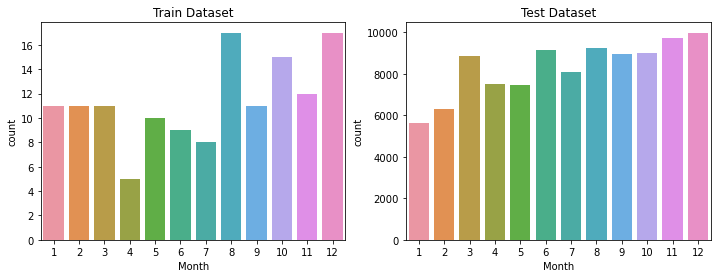

In [63]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(12,4))
fig1=sns.countplot(train_df1['Month'],ax=fig1)
fig1.set_title("Train Dataset")
fig2=sns.countplot(test_df1['Month'],ax=fig2)
fig2.set_title("Test Dataset")
f.show()

It can be observed that most of the restaurants were opened during August,October,November and December etc. 


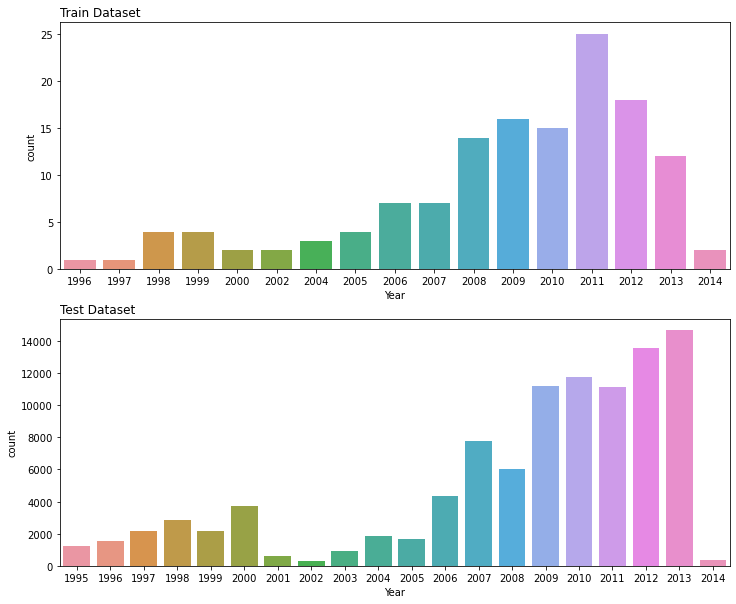

In [64]:
f,(fig1,fig2)=plt.subplots(2,1,figsize=(12,10))
fig1=sns.countplot(train_df1['Year'],ax=fig1)
fig1.set_title("Train Dataset",loc='left')
fig2=sns.countplot(test_df1['Year'],ax=fig2)
fig2.set_title("Test Dataset",loc='left')
f.show()

Here, we could observe that most no. of restaurants were launched after the year 2006.

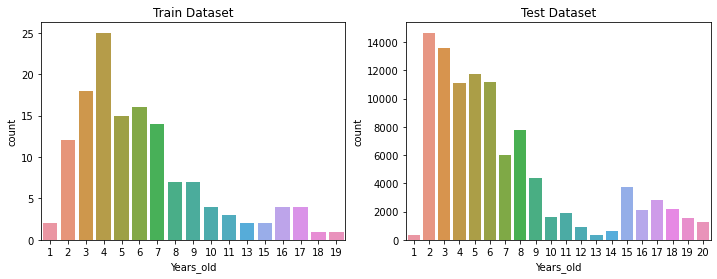

In [75]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(12,4))
fig1=sns.countplot(train_df1['Years_old'],ax=fig1)
fig1.set_title("Train Dataset")
fig2=sns.countplot(test_df1['Years_old'],ax=fig2)
fig2.set_title("Test Dataset")
f.show()

This visualization is also give the same insights given by the feature-Year. But we can make use of this feature in the multivariate analysis. 

The new features generated may be more useful for EDA when we use it with other features.

Let's check this while doing the Multivariate Analysis

So far we have done analysis for Categorical variables. Now let's go ahead and do analaysis for the Numerical varaiables in the dataset.

### Numerical Faetures

##### Obfuscate variables

The dataset has got 37 p-variables(obfuscate variables) 
which reperesent three categories
-Demographic Data, Real Estate data and Commercial Data.

Let's explore through the histogram plots of these variables ...

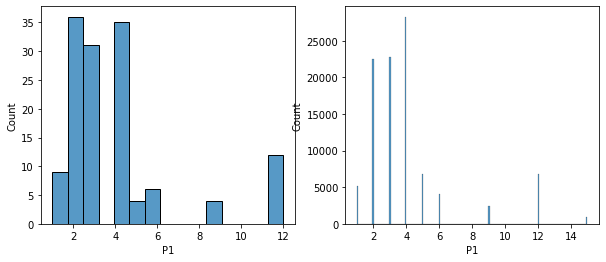

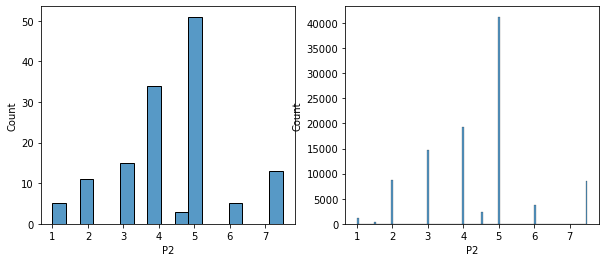

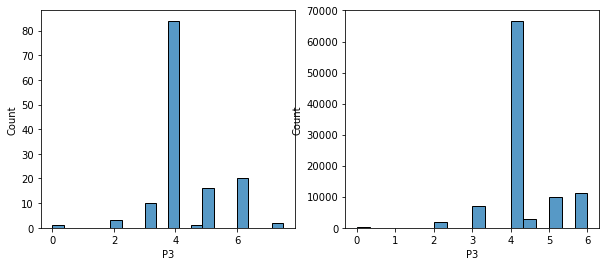

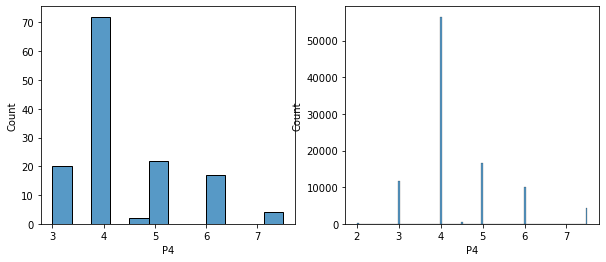

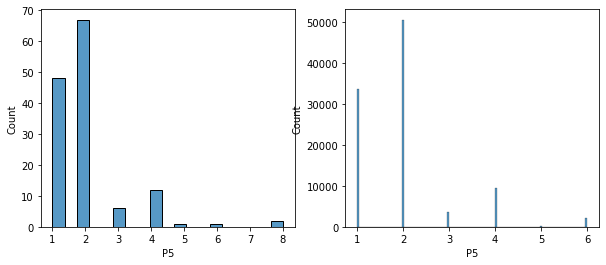

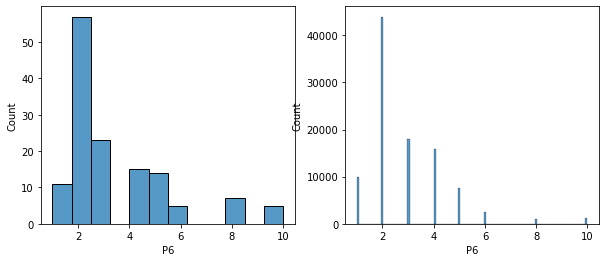

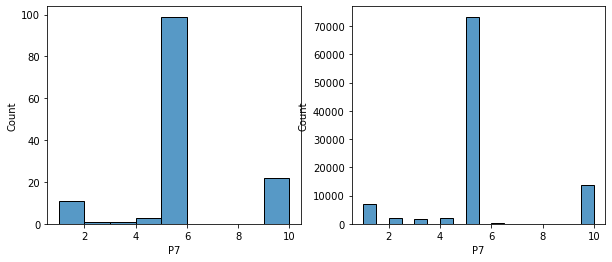

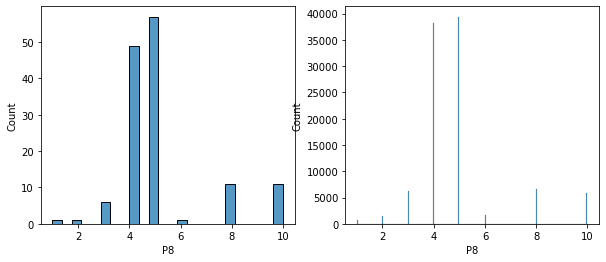

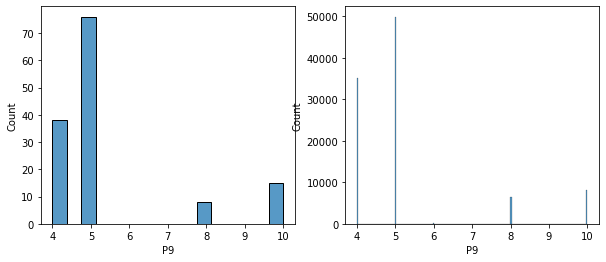

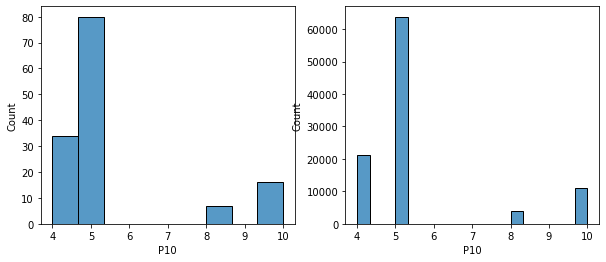

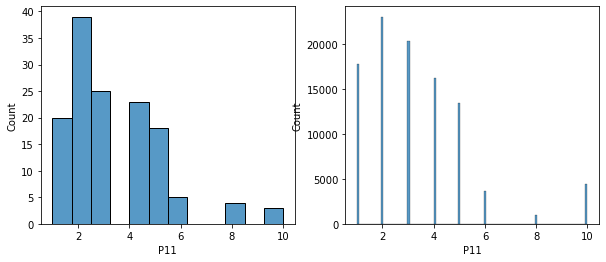

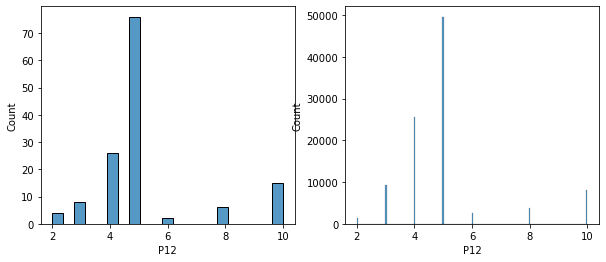

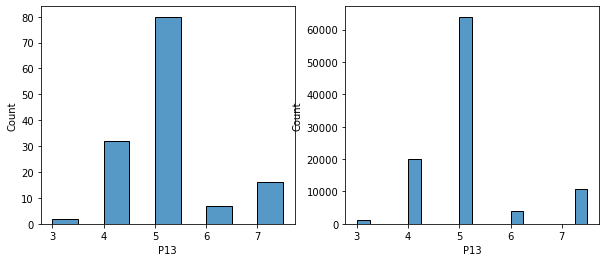

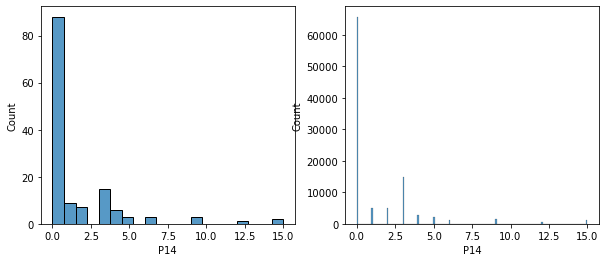

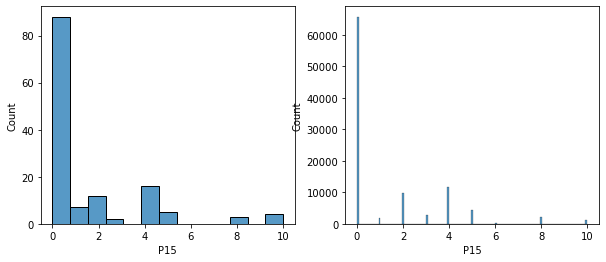

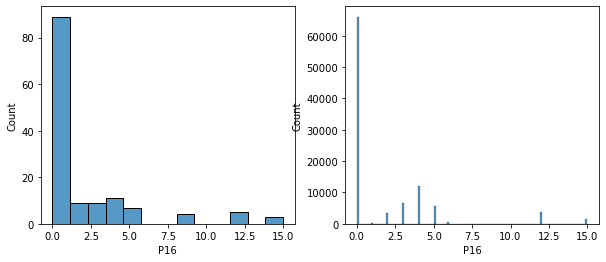

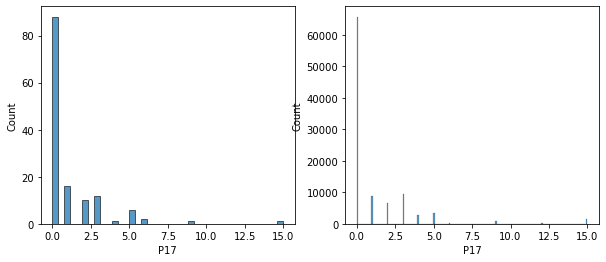

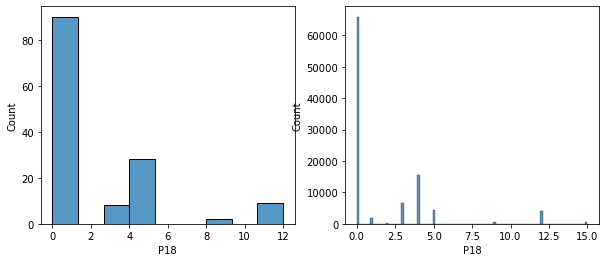

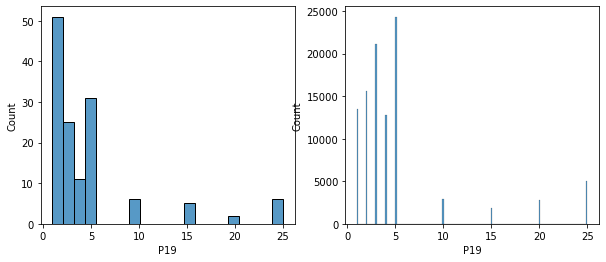

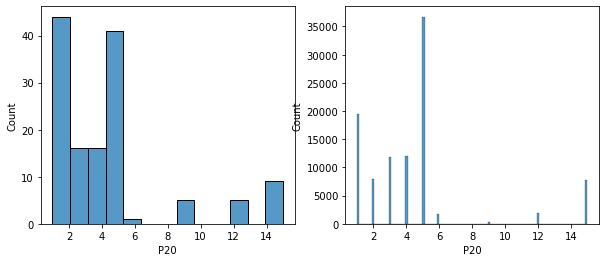

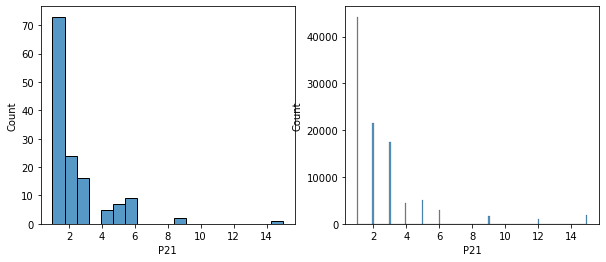

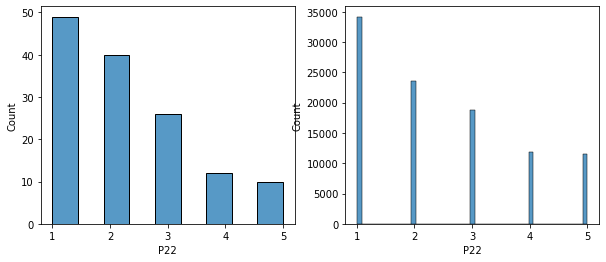

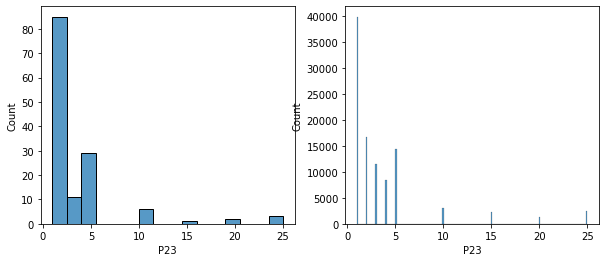

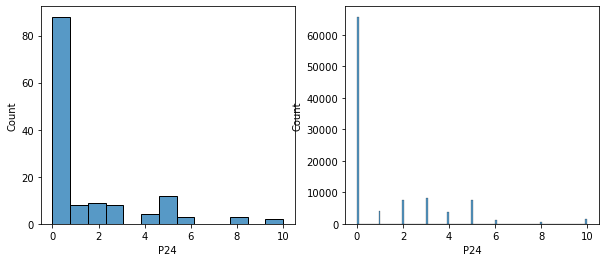

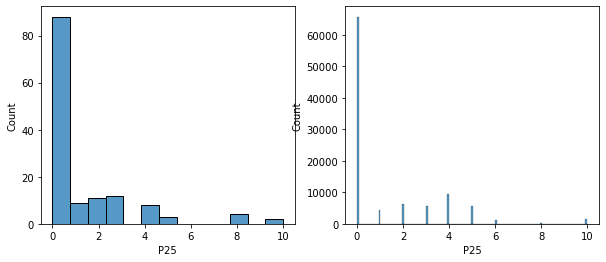

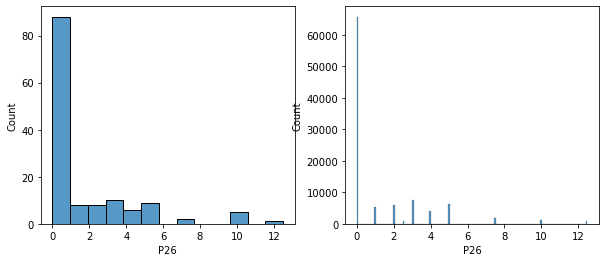

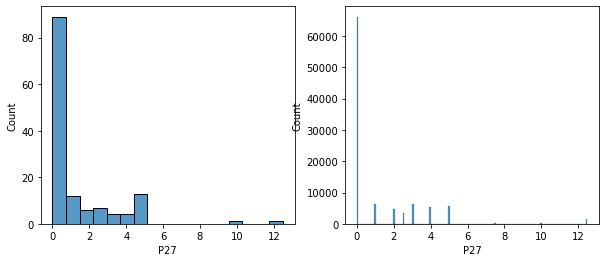

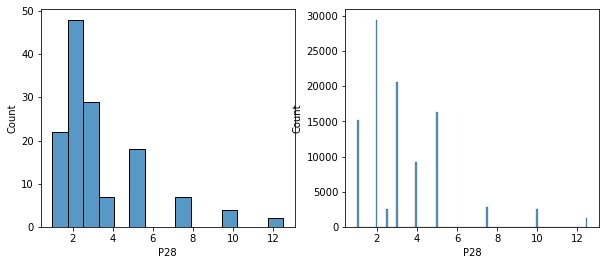

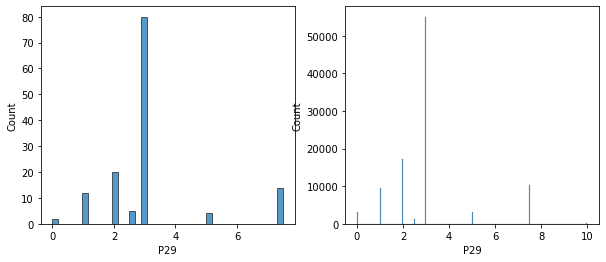

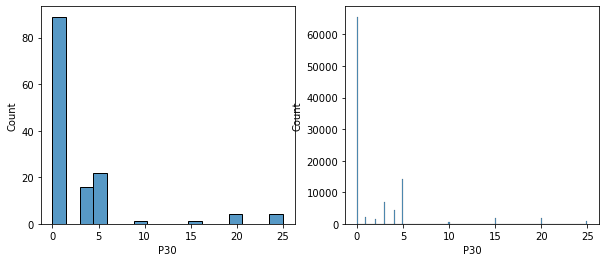

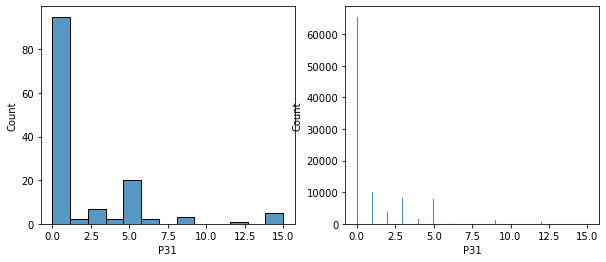

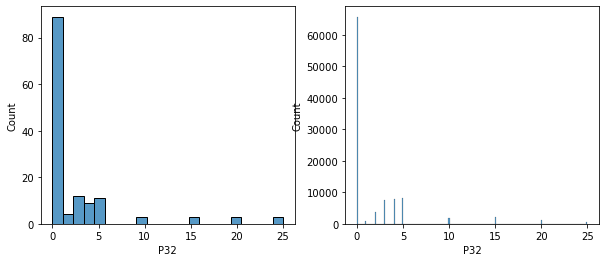

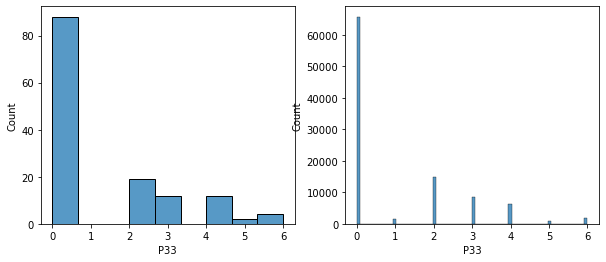

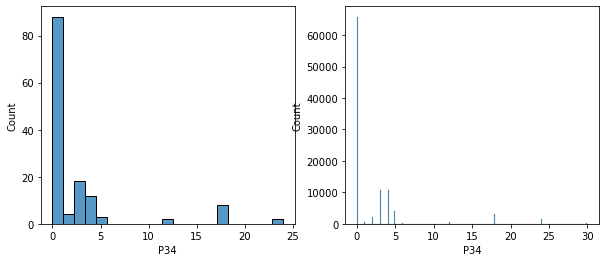

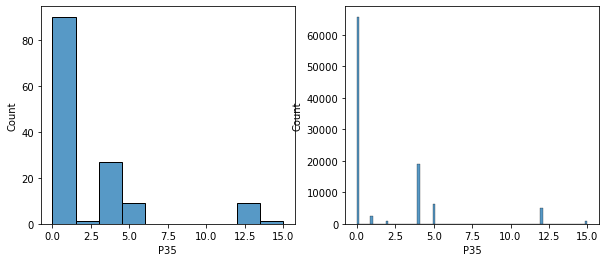

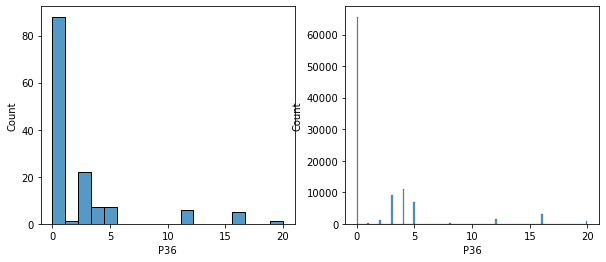

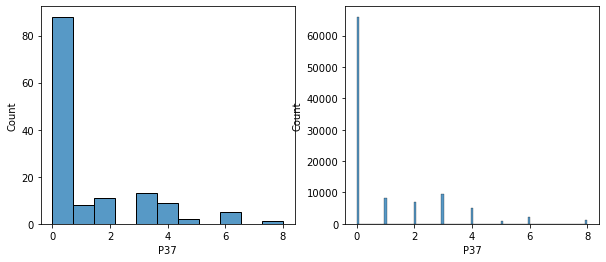

In [265]:
for i in range(1,38):
    f,(fig1,fig2)=plt.subplots(1,2,figsize=(10,4))
    fig1=sns.histplot(train_df1['P{}'.format(i)],ax=fig1)
    fig2=sns.histplot(test_df1['P{}'.format(i)],ax=fig2)
    f.show()

Most of these variables has zero as their majority values.  


## Multivariate Analysis

##### Type v/s Revenue

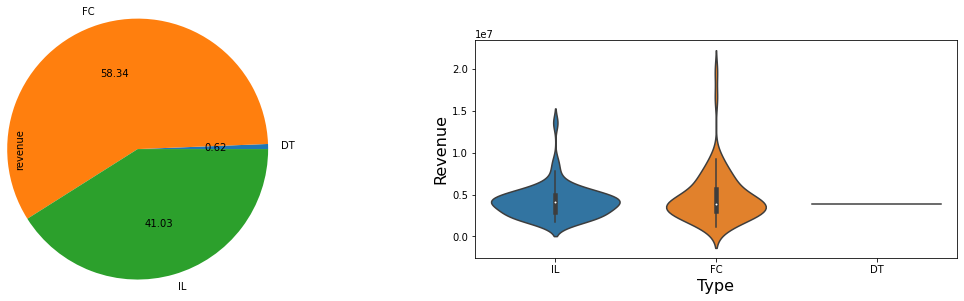

In [98]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(19,4))
fig1=train_df1.groupby('Type').revenue.sum().plot(kind='pie',radius=1.5,autopct='%.2f',ax=fig1)
# fig2=sns.boxplot(x=train_df1['Type'],y=train_df1['revenue'],ax=fig2)
# fig2.set_ylabel('Revenue',fontsize=16)
# fig2.set_xlabel('Type',fontsize=16)
fig2=sns.violinplot(x=train_df1['Type'],y=train_df1['revenue'],ax=fig2)
fig2.set_ylabel('Revenue',fontsize=16)
fig2.set_xlabel('Type',fontsize=16)
plt.show()


From the Type v/s Revenue Pie plot it is evident that the Food Court type restaurants are generating the highest revenue. 
But this is obvious since the number of Food Court Type restaurants are also the highest . 

So, we have plotted the Violin plot for giving more meaningfull insights. 

From the distributions it is evident that the Food Courts itself is the higest revenue generating type which followed Inline and Drive-Thru type restaurants closely behind. 

##### City vs Revenue

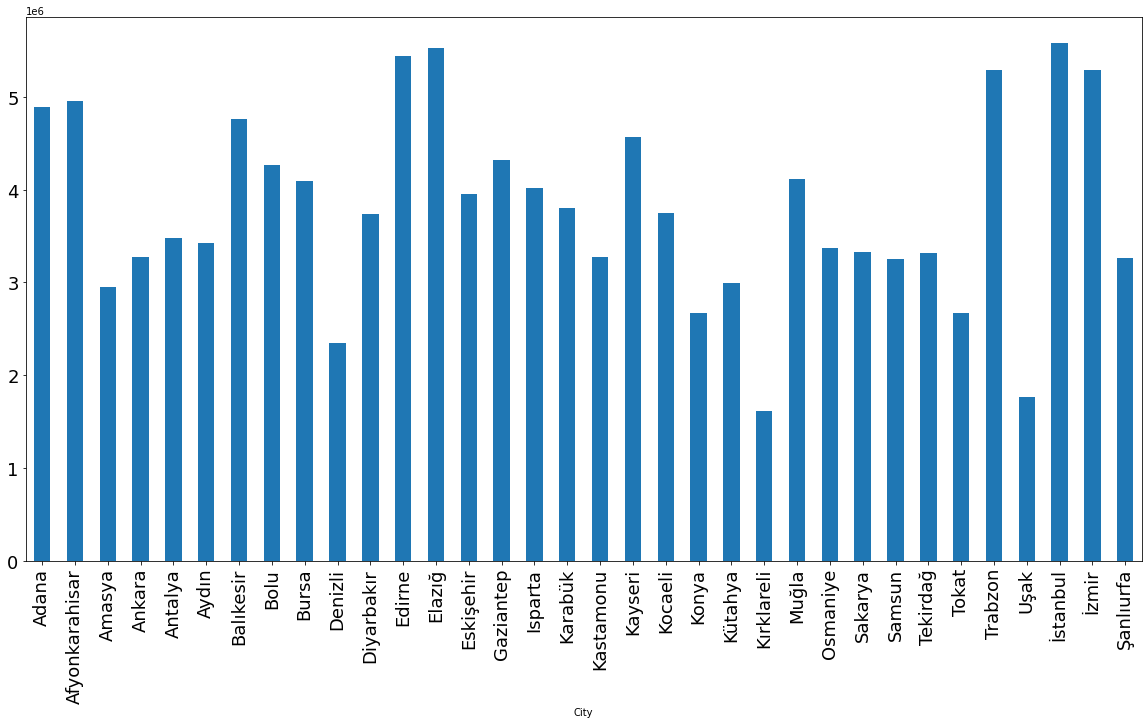

In [80]:
plt.figure(figsize=(20,10))
train_df1.groupby('City').revenue.mean().plot(kind='bar',fontsize=18)
plt.show()

The barplot reveals that Istanbul, Elazig, Izmir, Trabzon, Diyabaklr are the cities generating highest average revenue of all. 

While the restaurants in the city of Kirklareli, Usak performs the worst in terms of revenue.

##### City Type vs Revenue

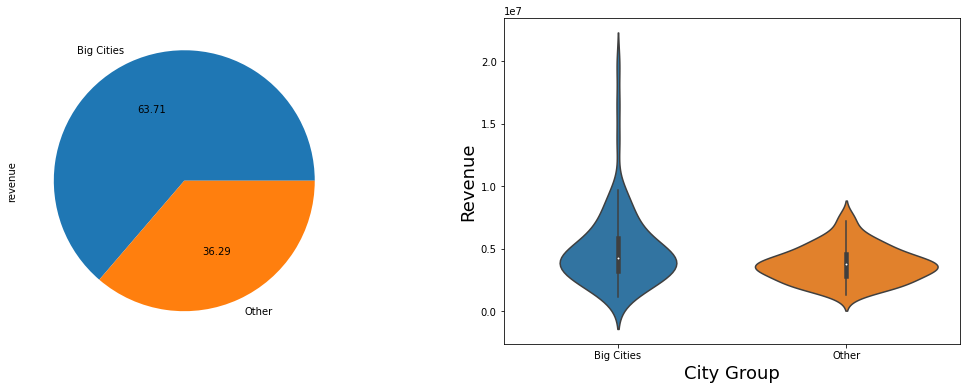

In [100]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(18,6))
fig1=train_df1.groupby('City Group').revenue.sum().plot(kind='pie',radius=1.0,autopct='%.2f',ax=fig1)
fig2=sns.violinplot(x=train_df1['City Group'],y=train_df1['revenue'],ax=fig2)
fig2.set_ylabel('Revenue',fontsize=18)
fig2.set_xlabel('City Group',fontsize=18)

plt.show()

The restaurants in the Big cities contributes about two third of the whole revenue genearted by TFI restaurants. 

From the Violin plot it is evident that the more revenue per restaurant is also generated by restaurants in Big Cities than that in Other Cities.

##### Years old v/s Revenue 

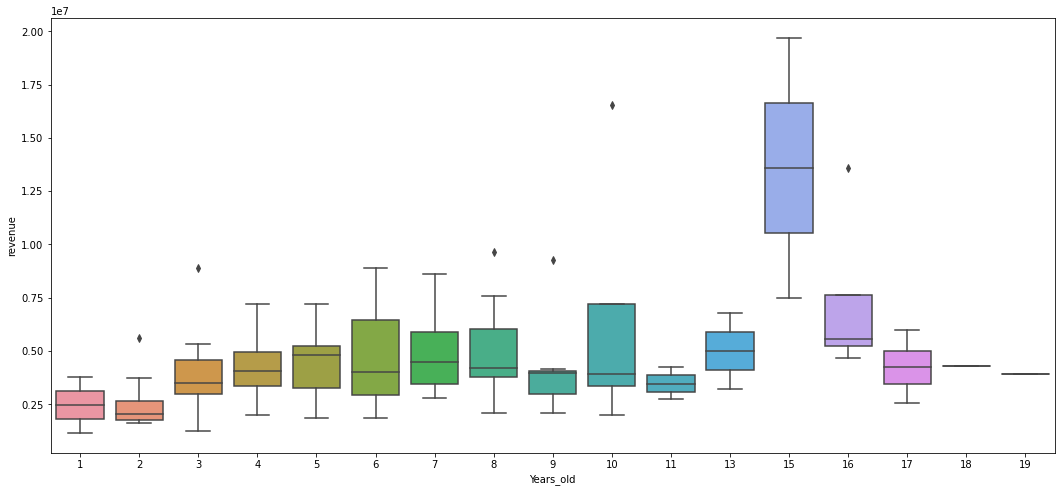

In [106]:
plt.figure(figsize=(18,8))
sns.boxplot(x=train_df1['Years_old'],y=train_df1['revenue'])
plt.show()

From the above plot we see a trend that the restaurants which are established many years back are generating higher revenues when compared to newly launched restaurants.

### Reorganising the Columns 

Before Plotting the Correlation Matrix let's reorder the columns in our dataset .

In [120]:
#Checkpoint 2
train_df2=train_df1.copy()
test_df2=test_df1.copy()

In [109]:
train_df1.columns

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue', 'Date', 'Month', 'Year', 'Years_old'],
      dtype='object')

In [130]:
train_cols=['Open Date','Date','Month', 'Year', 'Years_old','City', 'City Group' ,'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37',   'revenue']

test_cols=['Open Date', 'Date','Month', 'Year', 'Years_old','City', 'City Group','Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37']

In [134]:
train_df2=train_df2[train_cols]
train_df2.head(2)

,Open Date,Date,Month,Year,Years_old,City,City Group,Type,P1,P2,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,1999-07-17,7,1999,16,İstanbul,Big Cities,IL,4,5.0,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,2008-02-14,2,2008,7,Ankara,Big Cities,FC,4,5.0,...,3.0,0,0,0,0,0,0,0,0,6923131.0


In [133]:
test_df2=test_df2[test_cols]
test_df2.head(2)

,Open Date,Date,Month,Year,Years_old,City,City Group,Type,P1,P2,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,2011-01-22,1,2011,4,Niğde,Other,FC,1,4.0,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,2011-03-18,3,2011,4,Konya,Other,IL,3,4.0,...,1.0,3.0,0,0,0,0,0,0,0,0


## Correlation Matrix

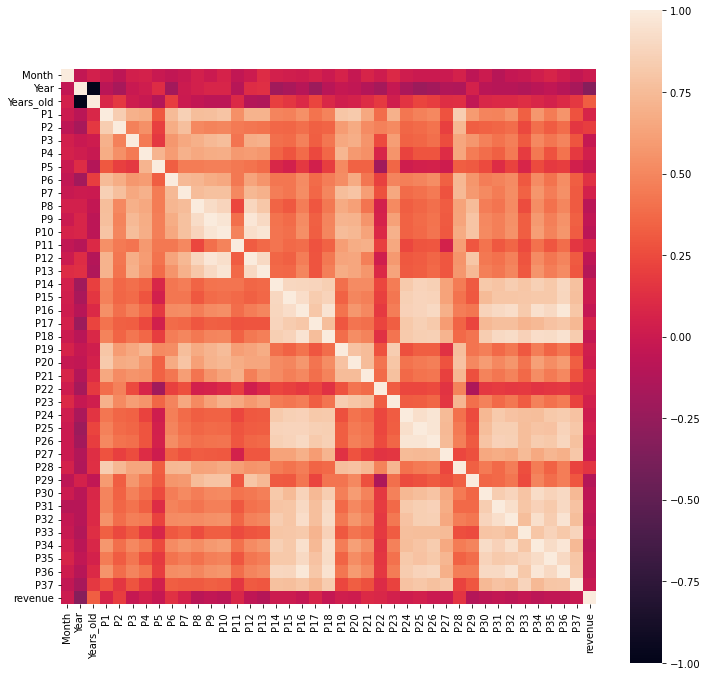

In [141]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df2.corr(),square=True)
plt.show()

# Feature Engineering

In [239]:
#Checkpoint 3
train_df3=train_df2.copy()
test_df3=test_df2.copy()

From the exploratory data analysis of both the datasets, we have found that some features has to be altered, dropped due to some reasons. 



So, lets go through those features and handle them accordingly ...

### Revenue

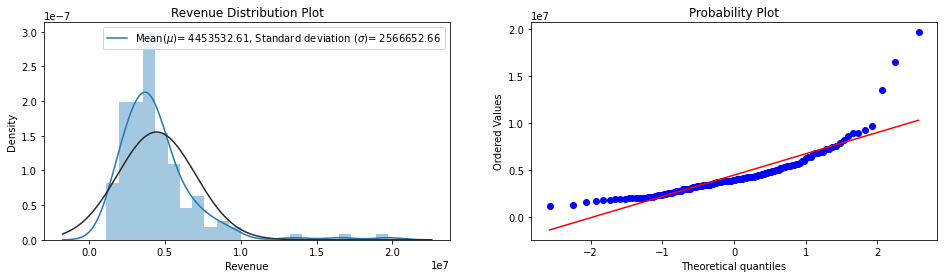

In [240]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(16,4))
mean,sd=norm.fit(train_df3.revenue)
fig1=sns.distplot(train_df3.revenue,ax=fig1,fit=norm)
fig1.set_xlabel("Revenue")
fig1.set_title("Revenue Distribution Plot")
fig1.legend([f'Mean($\mu$)= {mean:.2f}, Standard deviation ($\sigma$)= {sd:.2f}'],loc='best')
fig2=stats.probplot(train_df3.revenue,plot=fig2)
f.show()


In the above plot, even the normalized curve shows some skewness to the right. This implies the effect of outliers persists. 

Let's plot boxplot for better understanding  

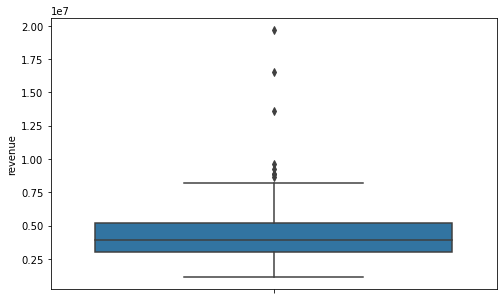

In [241]:
plt.figure(figsize=(8,5))
sns.boxplot(y = train_df3['revenue']) 
plt.show()

We could easily observe some outliers beyond the whiskers. This could effect the model's perfomance. 

Hence they have to be treated accordingly. 

So, let's check the percentile values to figure out the threshold for removing outliers from the data .

In [242]:
for i in range(90,100,1):
  print("At",i,"th percentile :",np.percentile(train_df3['revenue'],i).round(2))



At 90 th percentile : 7045417.4
At 91 th percentile : 7213830.0
At 92 th percentile : 7506753.6
At 93 th percentile : 7723386.88
At 94 th percentile : 8157828.64
At 95 th percentile : 8683465.2
At 96 th percentile : 8899910.16
At 97 th percentile : 9234060.4
At 98 th percentile : 10750754.72
At 99 th percentile : 15478481.6


So the 98th percentile is the threshold that can be used.

In [243]:
train_df3=train_df3[train_df3['revenue']<train_df3['revenue'].quantile(.98)]
train_df3.shape

(134, 46)

Here, the number of rows has reduced to 134 from 137. 

That indicates 3 rows are dropped since their corresponding revenue values are outliers.

Lets plot the distplot of the revenue after oulier removal.

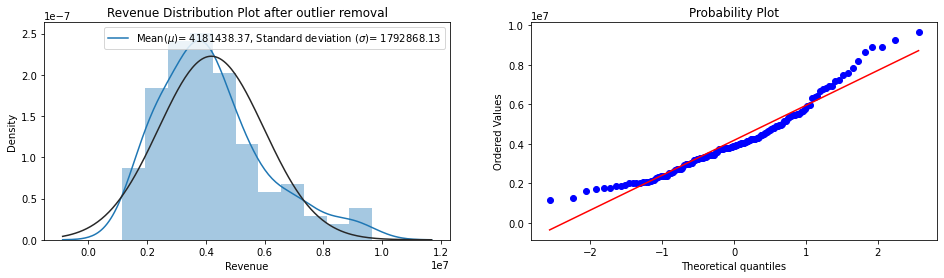

In [244]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(16,4))
mean,sd=norm.fit(train_df3.revenue)
fig1=sns.distplot(train_df3.revenue,ax=fig1,fit=norm)
fig1.set_xlabel("Revenue")
fig1.set_title("Revenue Distribution Plot after outlier removal")
fig1.legend([f'Mean($\mu$)= {mean:.2f}, Standard deviation ($\sigma$)= {sd:.2f}'],loc='best')
fig2=stats.probplot(train_df3.revenue,plot=fig2)
f.show()

Since it is right skewed, now lets log transform the revenue values to make it normally distributed. 

In [245]:
train_df3['revenue_log']=np.log(train_df3['revenue'])

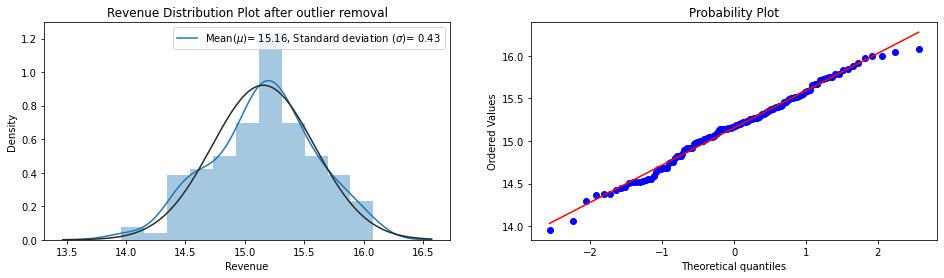

In [246]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(16,4))
mean,sd=norm.fit(train_df3.revenue_log)
fig1=sns.distplot(train_df3.revenue_log,ax=fig1,fit=norm)
fig1.set_xlabel("Revenue")
fig1.set_title("Revenue Distribution Plot after outlier removal")
fig1.legend([f'Mean($\mu$)= {mean:.2f}, Standard deviation ($\sigma$)= {sd:.2f}'],loc='best')
fig2=stats.probplot(train_df3.revenue_log,plot=fig2)
f.show()

Now, we could observe that the distribution is almost normally distributed. 
Also the Q-Q plots are almost linear. 

Since the target variable is processed, we can store the input and targets variables in differnet variables .

In [247]:
#Splitting thetrain dataset as inputs and targets
x_train=train_df3.drop(['revenue','revenue_log'],axis=1)#input variables
y_train_revenue=train_df3['revenue']
y_train=train_df3['revenue_log']#target variables


In [248]:
x_train.head(2)

,Open Date,Date,Month,Year,Years_old,City,City Group,Type,P1,P2,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,07/17/1999,1999-07-17,7,1999,16,İstanbul,Big Cities,IL,4,5.0,...,2.0,3.0,5,3,4,5,5,4,3,4
1,02/14/2008,2008-02-14,2,2008,7,Ankara,Big Cities,FC,4,5.0,...,3.0,3.0,0,0,0,0,0,0,0,0


In [249]:
y_train.head(2)

0    15.547830
1    15.750379
Name: revenue_log, dtype: float64

In [250]:
x_test=test_df3

### Dropping unncessary columns

There are many unnecessary or irrelvant columns in the dataset. Let's remove them

Since the Month,Year,Years_old features have extracted relevant informations, the other features like Open Date, Date can be dropped. 

In [251]:
x_train=x_train.drop(['Open Date','Date'],axis=1)
x_train.head(2)

,Month,Year,Years_old,City,City Group,Type,P1,P2,P3,P4,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,7,1999,16,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,...,2.0,3.0,5,3,4,5,5,4,3,4
1,2,2008,7,Ankara,Big Cities,FC,4,5.0,4.0,4.0,...,3.0,3.0,0,0,0,0,0,0,0,0


In [252]:
#removing from test dataset
x_test=x_test.drop(['Open Date','Date'],axis=1)
x_test.head(2)

,Month,Year,Years_old,City,City Group,Type,P1,P2,P3,P4,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,2011,4,Niğde,Other,FC,1,4.0,4.0,4.0,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,2011,4,Konya,Other,IL,3,4.0,4.0,4.0,...,1.0,3.0,0,0,0,0,0,0,0,0


### City

In [253]:
print("No. of cities in Train data : ",x_train['City'].nunique())
print("No. of cities in Train data : ",x_test['City'].nunique())

No. of cities in Train data :  34
No. of cities in Train data :  57


As the no. of cities in the Train and Test dataset vary by a big number and these cities are not seen in the training data, the feature City will not be usefull.

So we can remove this feature.

In [254]:
x_train=x_train.drop(['City'],axis=1)
x_train.head(2)

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,7,1999,16,Big Cities,IL,4,5.0,4.0,4.0,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,2,2008,7,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,3.0,0,0,0,0,0,0,0,0


In [255]:
x_test=x_test.drop(['City'],axis=1)
x_test.head(2)

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,2011,4,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,2011,4,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0


We have dropped all the irrelevant or unwanted features from the dataset. 

Now, we have to encode the categorical features to numbers for modelling to work.

## Label Encoding

In [256]:
categorical_columns=list(x_train.select_dtypes(include=['object']).columns)
print(categorical_columns)
print("No. of Categorical Columns : ",len(categorical_columns))

['City Group', 'Type']
No. of Categorical Columns :  2


In [257]:
def encoder(data):
    label_encoder=preprocessing.LabelEncoder()
    data['Type']=label_encoder.fit_transform(data['Type'])
    data['City Group']=label_encoder.fit_transform(data['City Group'])
    return data.head(5)


In [258]:
encoder(x_train)

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,7,1999,16,0,2,4,5.0,4.0,4.0,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,2,2008,7,0,1,4,5.0,4.0,4.0,1,...,3.0,3.0,0,0,0,0,0,0,0,0
2,3,2013,2,1,2,2,4.0,2.0,5.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
3,2,2012,3,1,2,6,4.5,6.0,6.0,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,5,2009,6,1,2,3,4.0,3.0,4.0,2,...,1.0,3.0,5,1,3,2,3,4,3,3


In [259]:
encoder(x_test)

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,2011,4,1,1,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,2011,4,1,2,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10,2013,2,0,1,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,5,2013,2,1,2,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,7,2013,2,1,1,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [267]:
# Checkpoint 4
x_train1=x_train.copy()
x_test1=x_test.copy()
y_train1=y_train.copy()

In [268]:
print("Train Data -- inputs: ",x_train1.shape,"Targets : ",y_train1.shape)
print("Test Data -- ",x_test1.shape)

Train Data -- inputs:  (134, 42) Targets :  (134,)
Test Data --  (100000, 42)


## Standardization 

In [269]:
scalar=StandardScaler()
X_train=scalar.fit_transform(x_train1)
X_test=scalar.transform(x_test1)

In [270]:
X_train.shape

(134, 42)

In [271]:
X_test.shape

(100000, 42)

### Dimensionality Reduction 

We can reduce the the dimensions of the data using Principal Component Analysis (PCA).


In [272]:
pca=PCA(n_components=20)
pca_x_train=pca.fit_transform(X_train)
pca_x_test=pca.transform(X_test)


In [275]:
pca_x_train.shape

(134, 20)

In [276]:
pca_x_test.shape

(100000, 20)

The no. of dimensions has reduced to 20 after applying PCA with no. of components as 20.

Let's check the explained variance and it's ratio .

In [277]:
variance=pca.explained_variance_

In [278]:
variance

array([21.00870027,  6.73862827,  2.72556422,  1.78610166,  1.5247974 ,
        1.31668701,  1.04603402,  0.75504368,  0.60587246,  0.53216826,
        0.48962287,  0.43204138,  0.35762645,  0.32277324,  0.30847824,
        0.28376667,  0.2592096 ,  0.22979194,  0.17588765,  0.17326338])

In [279]:
variance_ratio=pca.explained_variance_ratio_


In [280]:
variance_ratio

array([0.49647426, 0.15924619, 0.0644101 , 0.04220887, 0.03603377,
       0.03111574, 0.02471971, 0.01784307, 0.01431788, 0.01257612,
       0.01157069, 0.01020993, 0.00845137, 0.00762773, 0.00728991,
       0.00670593, 0.0061256 , 0.00543041, 0.00415655, 0.00409453])